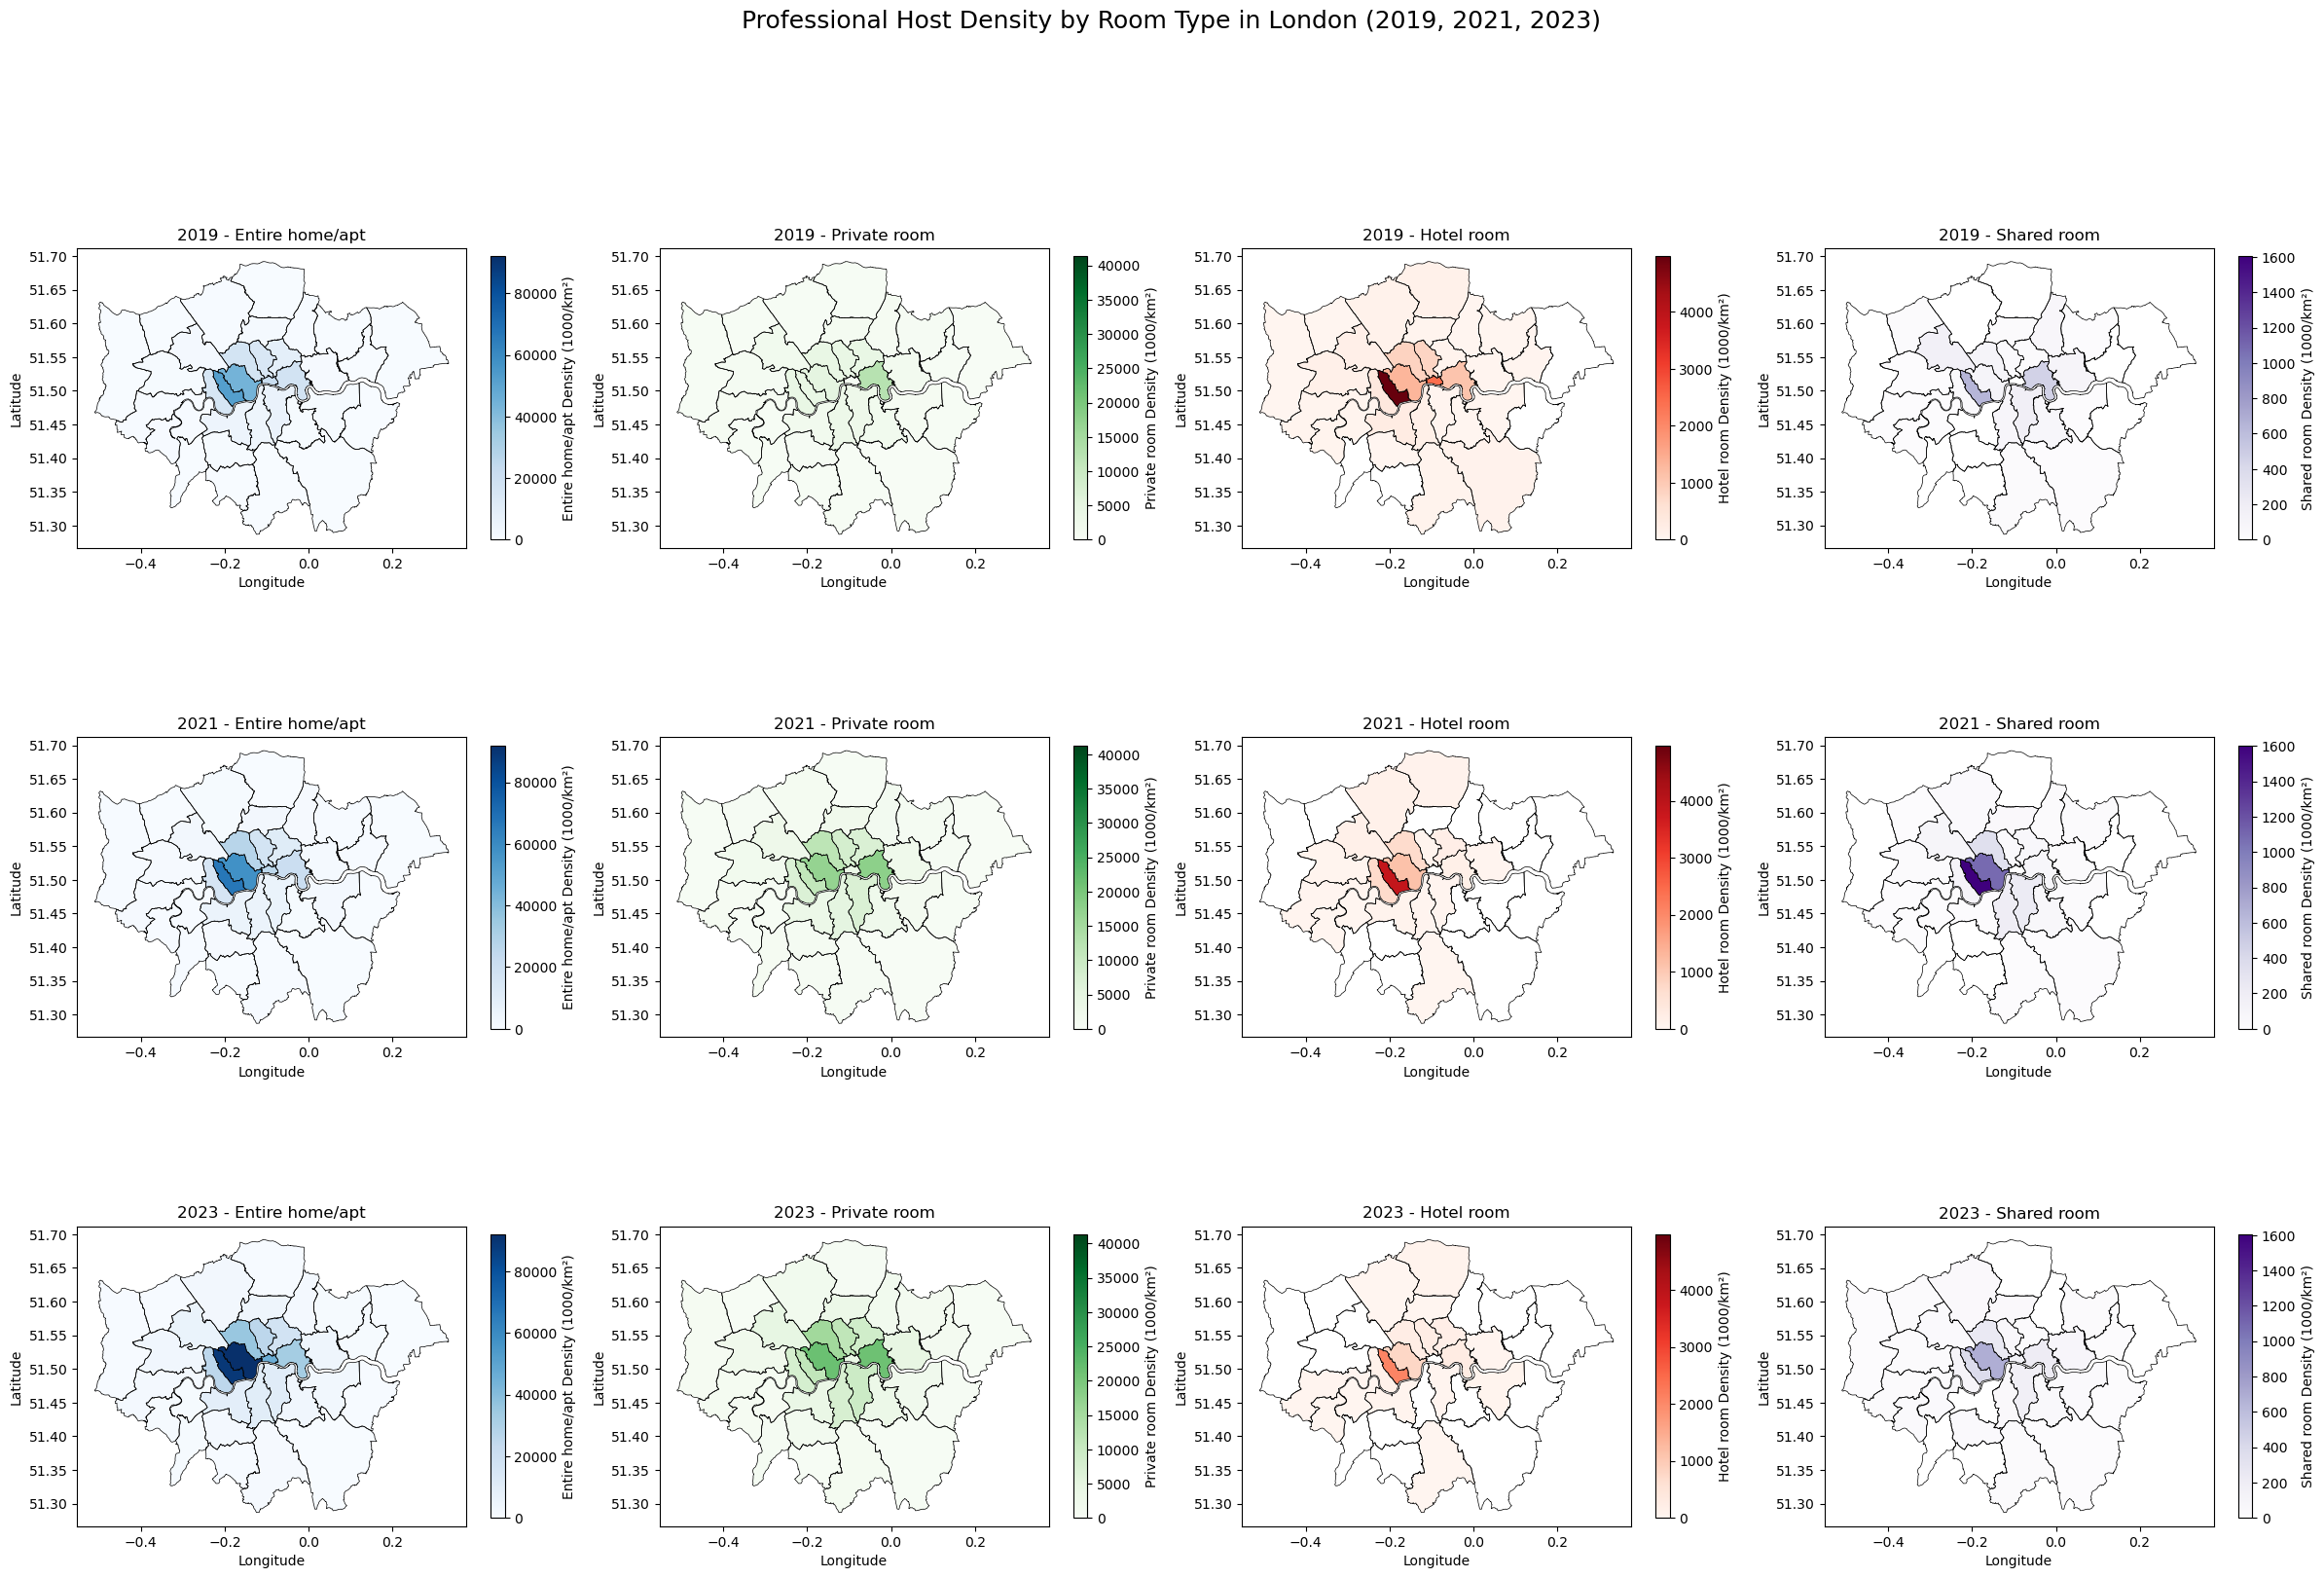

In [10]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load data files
file_paths = {
    "2019": "cleaned_2019_data.csv",
    "2021": "cleaned_2021_data.csv",
    "2023": "cleaned_2023_data.csv",
}
dataframes = []

# Load data and add year column
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['year'] = year
    dataframes.append(df)

# Combine data
combined_data = pd.concat(dataframes, ignore_index=True)

# Load shapefile
boroughs = gpd.read_file("London_Borough_Excluding_MHW.shp").to_crs("EPSG:4326")
boroughs['area_km2'] = boroughs['geometry'].to_crs(epsg=3395).area / 1e6

# Select necessary columns
columns_needed = ['year', 'host_id', 'calculated_host_listings_count', 'neighbourhood_cleansed', 'room_type']
host_data = combined_data[columns_needed].dropna()

# Add host type
host_data['host_type'] = host_data['calculated_host_listings_count'].apply(
    lambda x: "Non-professional" if x <= 2 else "Professional"
)

# Calculate density by year, neighborhood, room type, and host type
host_counts = host_data.groupby(
    ['year', 'neighbourhood_cleansed', 'room_type', 'host_type']
).size().reset_index(name='count')
host_counts = host_counts.merge(
    boroughs[['NAME', 'area_km2']],
    left_on='neighbourhood_cleansed',
    right_on='NAME',
    how='left'
)
host_counts['density'] = (host_counts['count'] / host_counts['area_km2']) * 1000

# Convert to GeoDataFrame
boroughs = boroughs.rename(columns={"NAME": "borough"})
data_geo = pd.merge(boroughs, host_counts, how="left", left_on="borough", right_on="neighbourhood_cleansed")

# Get unique room types and years
room_types = host_data['room_type'].unique()
years = host_data['year'].unique()

# Calculate density ranges for room types
density_ranges = {
    room_type: data_geo[data_geo['room_type'] == room_type]['density'].max()
    for room_type in room_types
}

# Combined plotting function for Professional Hosts across all years
def plot_combined_professional_density(data_geo, years, room_types, title, output_file, density_ranges, boroughs):
    fig, axes = plt.subplots(len(years), len(room_types), figsize=(len(room_types) * 6, len(years) * 6))
    colormaps = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges']

    for row, year in enumerate(years):
        year_data = data_geo[data_geo['year'] == year]
        professional_data = year_data[year_data['host_type'] == 'Professional']

        for col, room_type in enumerate(room_types):
            cmap = colormaps[col % len(colormaps)]

            # Plot Professional Hosts
            ax = axes[row, col]
            subset = professional_data[professional_data['room_type'] == room_type]
            boroughs.boundary.plot(ax=ax, color="black", linewidth=0.5)
            subset.plot(
                column='density',
                cmap=cmap,
                legend=True,
                legend_kwds={'label': f"{room_type} Density (1000/km²)", 'shrink': 0.5},
                ax=ax,
                vmin=0,
                vmax=density_ranges[room_type],
                missing_kwds={"color": "lightgrey", "label": "No data"}
            )
            ax.set_title(f"{year} - {room_type}", fontsize=12)
            ax.set_xlabel("Longitude")
            ax.set_ylabel("Latitude")
            ax.axis('on')

    # Set overall title
    plt.suptitle(title, fontsize=18, y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.savefig(output_file, dpi=300)
    plt.show()

# Plot combined density maps for all years
plot_combined_professional_density(
    data_geo,
    years,
    room_types,
    "Professional Host Density by Room Type in London (2019, 2021, 2023)",
    "combined_professional_host_density.png",
    density_ranges,
    boroughs
)


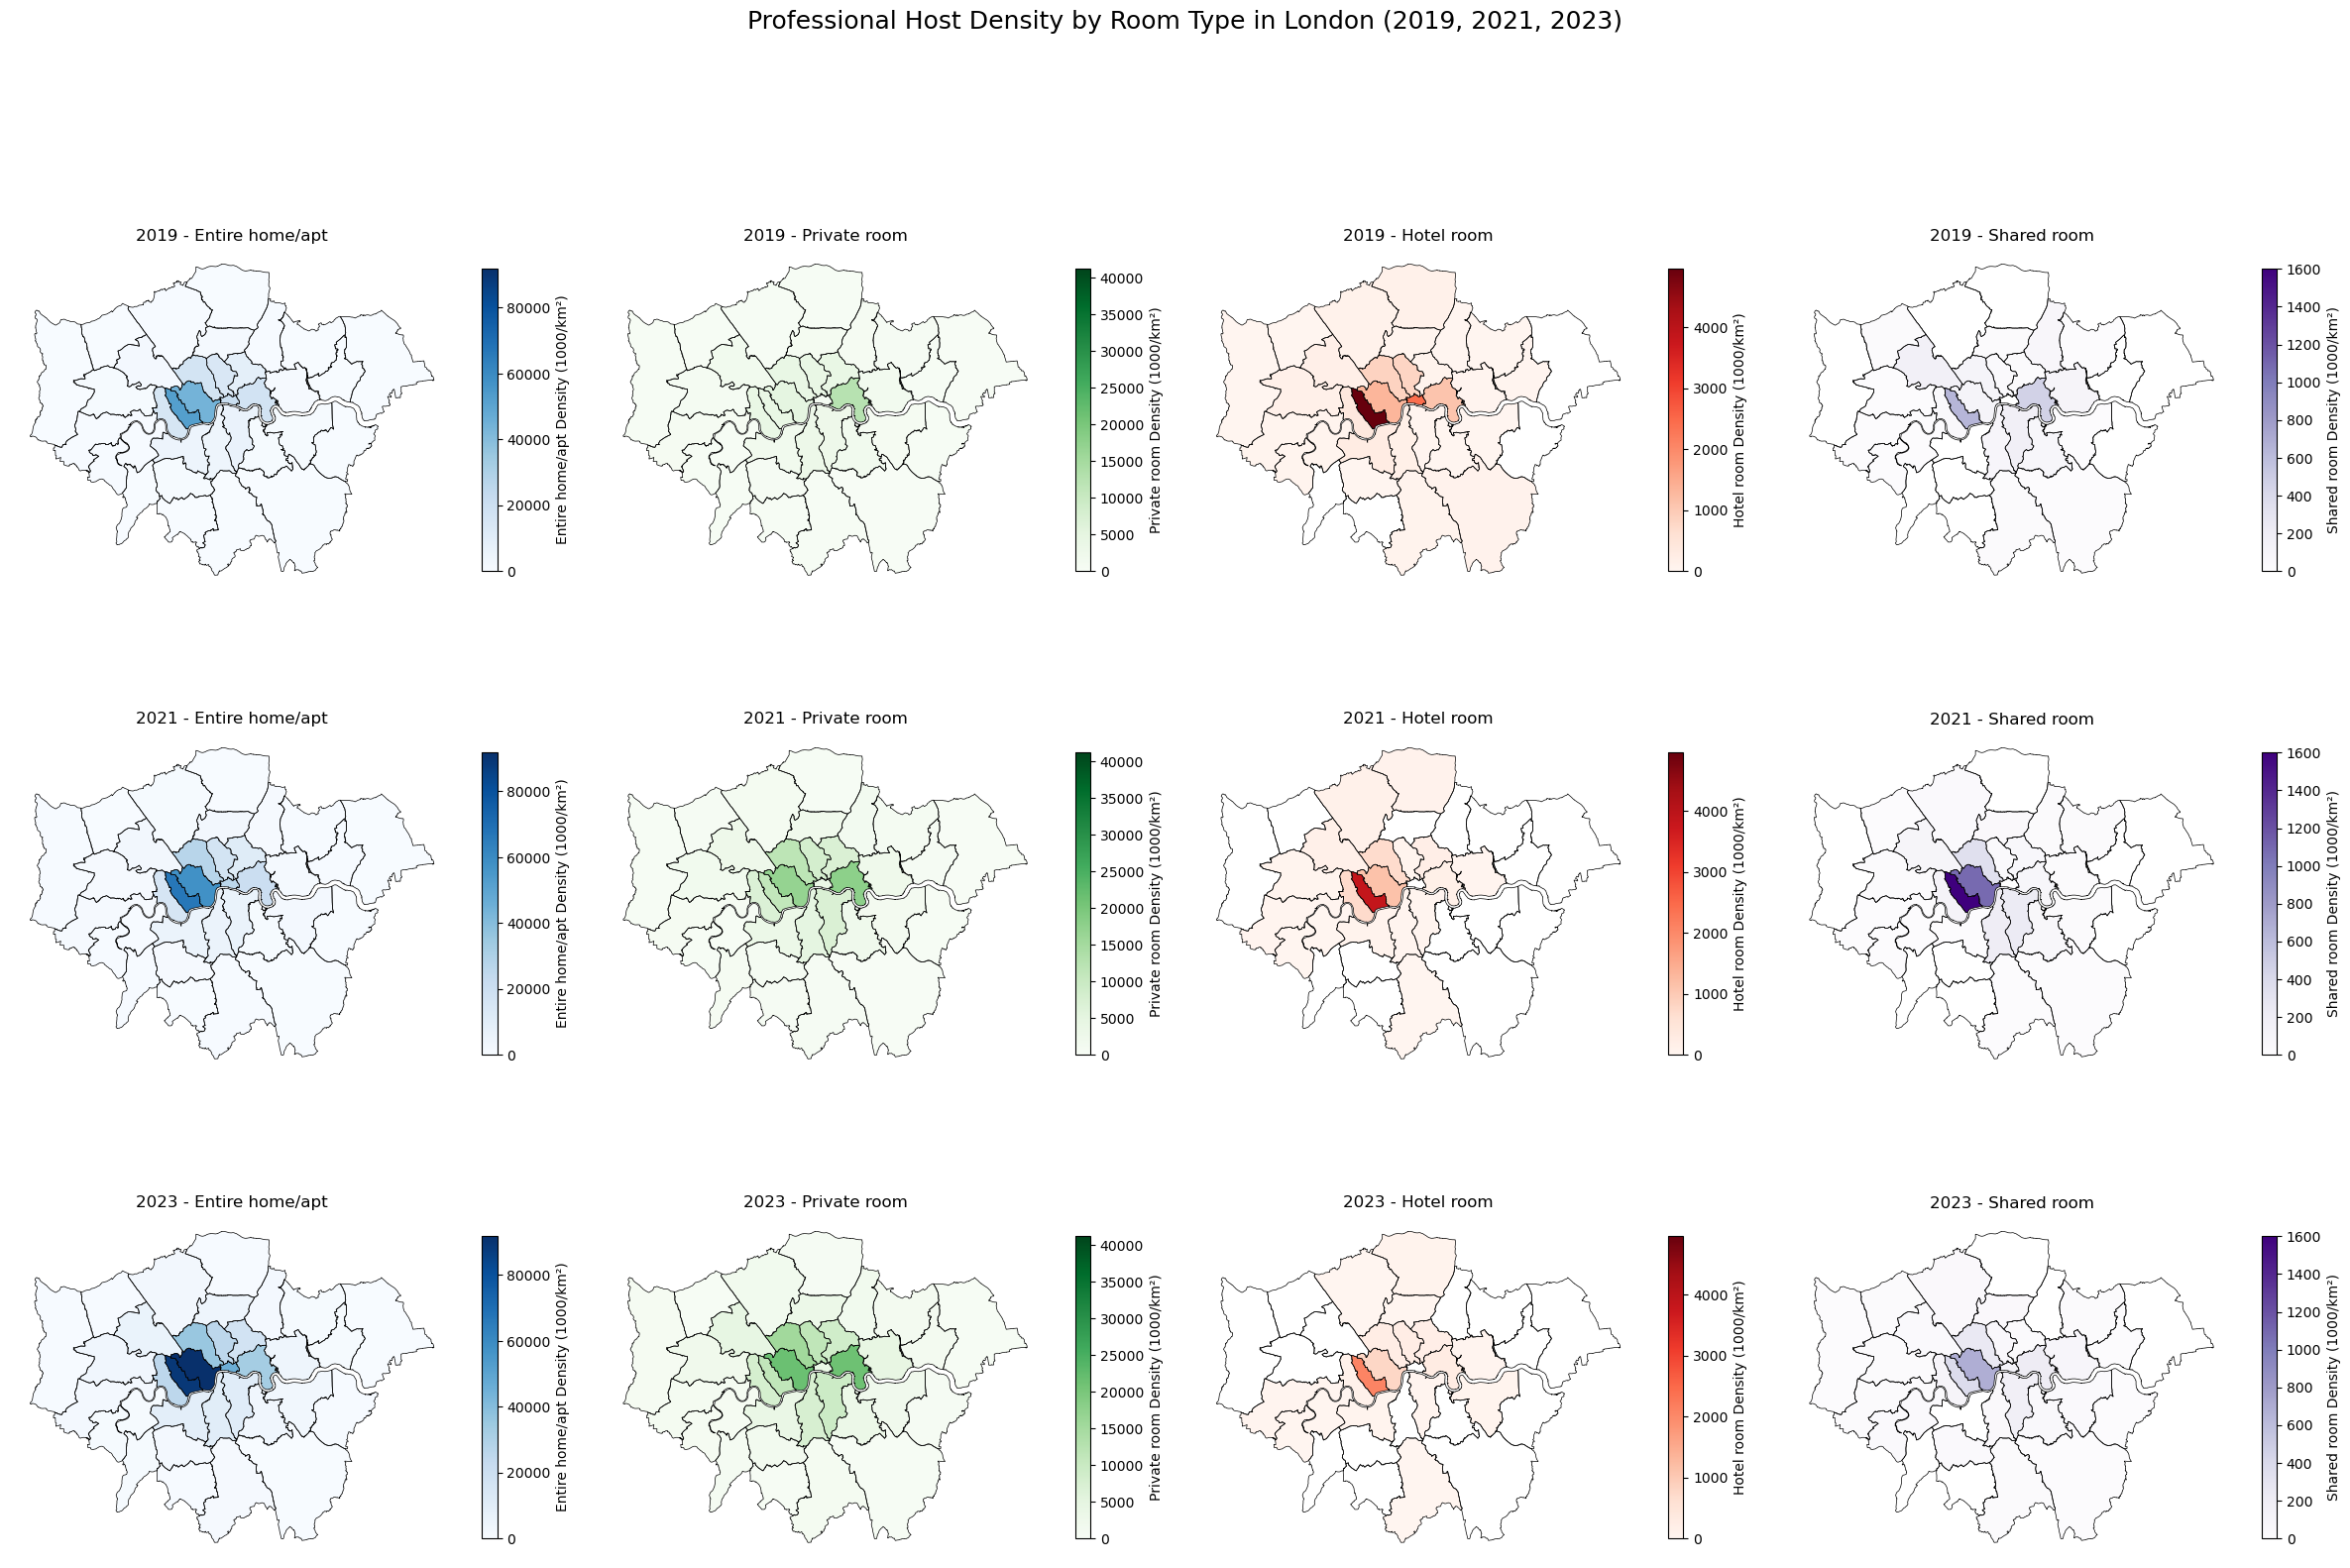

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load data files
file_paths = {
    "2019": "cleaned_2019_data.csv",
    "2021": "cleaned_2021_data.csv",
    "2023": "cleaned_2023_data.csv",
}
dataframes = []

# Load data and add year column
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['year'] = year
    dataframes.append(df)

# Combine data
combined_data = pd.concat(dataframes, ignore_index=True)

# Load shapefile
boroughs = gpd.read_file("London_Borough_Excluding_MHW.shp").to_crs("EPSG:4326")
boroughs['area_km2'] = boroughs['geometry'].to_crs(epsg=3395).area / 1e6

# Select necessary columns
columns_needed = ['year', 'host_id', 'calculated_host_listings_count', 'neighbourhood_cleansed', 'room_type']
host_data = combined_data[columns_needed].dropna()

# Add host type
host_data['host_type'] = host_data['calculated_host_listings_count'].apply(
    lambda x: "Non-professional" if x <= 2 else "Professional"
)

# Calculate density by year, neighborhood, room type, and host type
host_counts = host_data.groupby(
    ['year', 'neighbourhood_cleansed', 'room_type', 'host_type']
).size().reset_index(name='count')
host_counts = host_counts.merge(
    boroughs[['NAME', 'area_km2']],
    left_on='neighbourhood_cleansed',
    right_on='NAME',
    how='left'
)
host_counts['density'] = (host_counts['count'] / host_counts['area_km2']) * 1000

# Convert to GeoDataFrame
boroughs = boroughs.rename(columns={"NAME": "borough"})
data_geo = pd.merge(boroughs, host_counts, how="left", left_on="borough", right_on="neighbourhood_cleansed")

# Get unique room types and years
room_types = host_data['room_type'].unique()
years = host_data['year'].unique()

# Calculate density ranges for room types
density_ranges = {
    room_type: data_geo[data_geo['room_type'] == room_type]['density'].max()
    for room_type in room_types
}

# Combined plotting function for Professional Hosts across all years
def plot_combined_professional_density(data_geo, years, room_types, title, output_file, density_ranges, boroughs):
    fig, axes = plt.subplots(len(years), len(room_types), figsize=(len(room_types) * 6, len(years) * 6))
    colormaps = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges']

    for row, year in enumerate(years):
        year_data = data_geo[data_geo['year'] == year]
        professional_data = year_data[year_data['host_type'] == 'Professional']

        for col, room_type in enumerate(room_types):
            cmap = colormaps[col % len(colormaps)]

            # Plot Professional Hosts
            ax = axes[row, col]
            subset = professional_data[professional_data['room_type'] == room_type]
            boroughs.boundary.plot(ax=ax, color="black", linewidth=0.5)
            subset.plot(
                column='density',
                cmap=cmap,
                legend=True,
                legend_kwds={'label': f"{room_type} Density (1000/km²)", 'shrink': 0.5},
                ax=ax,
                vmin=0,
                vmax=density_ranges[room_type],
                missing_kwds={"color": "lightgrey", "label": "No data"}
            )
            ax.set_title(f"{year} - {room_type}", fontsize=12)
            ax.axis('off')

    # Set overall title
    plt.suptitle(title, fontsize=18, y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.savefig(output_file, dpi=300)
    plt.show()

# Plot combined density maps for all years
plot_combined_professional_density(
    data_geo,
    years,
    room_types,
    "Professional Host Density by Room Type in London (2019, 2021, 2023)",
    "combined_professional_host_density.png",
    density_ranges,
    boroughs
)
